In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, roc_auc_score
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
from xgboost import XGBRegressor
from scipy import stats
from scipy.stats import norm, skew
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import pickle
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LogisticRegression, ElasticNetCV, Ridge
from sklearn import tree
import sklearn.model_selection as ms
from sklearn.kernel_ridge import KernelRidge
from sklearn.ensemble import RandomForestRegressor

from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from scipy.special import boxcox1p
from sklearn import preprocessing
from sklearn.decomposition import PCA
import xgboost as xgb

In [58]:
def process_data(df, mode='train', pca_flag=True):
    
    for col in ('GarageType','GarageFinish', 'GarageQual', 'GarageCond'):
        df[col] = df[col].fillna('None')
        
    for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
        df[col] = df[col].fillna(0)
        
    for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
        df[col] = df[col].fillna('None')
        
    df["MasVnrType"] = df["MasVnrType"].fillna("None")
    df["MasVnrArea"] = df["MasVnrArea"].fillna(0)
    df['MSZoning'] = df['MSZoning'].fillna(df['MSZoning'].mode()[0])
    
    df["Functional"] = df["Functional"].fillna("Typ")
    df['Electrical'] = df['Electrical'].fillna(df['Electrical'].mode()[0])
    df['KitchenQual'] = df['KitchenQual'].fillna(df['KitchenQual'].mode()[0])
    df['Exterior1st'] = df['Exterior1st'].fillna(df['Exterior1st'].mode()[0])
    df['Exterior2nd'] = df['Exterior2nd'].fillna(df['Exterior2nd'].mode()[0])
    df['SaleType'] = df['SaleType'].fillna(df['SaleType'].mode()[0])
    df['MSSubClass'] = df['MSSubClass'].fillna("None")
    df["PoolQC"] = df["PoolQC"].fillna("None")
    df["MiscFeature"] = df["MiscFeature"].fillna("None")
    df["Alley"] = df["Alley"].fillna("None")
    df["FireplaceQu"] = df["FireplaceQu"].fillna("None")
    df["Fence"] = df["Fence"].fillna("None")
    #taking some numerical features converting them into categorical features
    df['MSSubClass'] = df['MSSubClass'].apply(str)
    #Changing OverallCond into a categorical variable
    df['OverallCond'] = df['OverallCond'].astype(str)
    #Year and month sold are transformed into categorical features.
    df['YrSold'] = df['YrSold'].astype(str)
    df['MoSold'] = df['MoSold'].astype(str)
    df['TotalSF'] = (
    df['BsmtFinSF1'].fillna(0) +
    df['BsmtFinSF2'].fillna(0) +
    df['1stFlrSF'].fillna(0) +
    df['2ndFlrSF'].fillna(0)
    )
    df['GarageCond'] = df['GarageCond'].map({'Ex': 4, 'Gd': 3, 'TA': 2, 'Fa': 1, 'Po': 0, 'None':0})
    df['GarageQual'] = df['GarageQual'].map({'Ex': 4, 'Gd': 3, 'TA': 2, 'Fa': 1, 'Po': 0, 'None':0})
    df['BsmtQual'] = df['BsmtQual'].map({'Ex': 4, 'Gd': 3, 'TA': 2, 'Fa': 1, 'Po': 0, 'None':0})
    df['BsmtCond'] = df['BsmtCond'].map({'Ex': 4, 'Gd': 3, 'TA': 2, 'Fa': 1, 'Po': 0, 'None':0})
    df['KitchenQual'] = df['KitchenQual'].map({'Ex': 4, 'Gd': 3, 'TA': 2, 'Fa': 1, 'Po': 0})
    df['ExterQual'] = df['ExterQual'].map({'Ex': 4, 'Gd': 3, 'TA': 2, 'Fa': 1, 'Po': 0})
    df['ExterCond'] = df['ExterCond'].map({'Ex': 4, 'Gd': 3, 'TA': 2, 'Fa': 1, 'Po': 0})
    df['HeatingQC'] = df['HeatingQC'].map({'Ex': 4, 'Gd': 3, 'TA': 2, 'Fa': 1, 'Po': 0})
    df['BsmtFinType1'] = df['BsmtFinType1'].map({'GLQ':6,'ALQ':5,'BLQ':4,'Rec':3,'LwQ':2,'Unf':1,"NA":0,'None':0})
    df['BsmtFinType2'] = df['BsmtFinType2'].map({'GLQ':6,'ALQ':5,'BLQ':4,'Rec':3,'LwQ':2,'Unf':1,"NA":0,'None':0})
    df['Functional'] = df['Functional'].map({'Typ':7,'Min1':6,'Min2':5,'Mod':4,'Maj1':3,'Maj2':2,'Sev':1,"Sal":0})
    df['BsmtExposure'] = df['BsmtExposure'].map({'Gd':4,'Av':3,'Mn':2,'No':1,"NA":0, 'None':0})
    df['GarageFinish'] = df['GarageFinish'].map({'Fin':3,'RFn':2,'Unf':1,"None":0,"NA":0})
    df['LandSlope'] = df['LandSlope'].map({'Gtl':2,'Mod':1,"Sev":0})
    df['LotShape'] = df['LotShape'].map({'Reg':3,'IR1':2,'IR2':1,"IR3":0})
    df['PavedDrive'] = df['PavedDrive'].map({'Y':2,'P':1,"N":0})
    df['CentralAir'] = df['CentralAir'].map({'Y': 1,'N': 0})
    columnsofneed = df.columns
    columnsofneed = columnsofneed.drop(['Id','Alley','PoolQC','Fence','MiscFeature','SalePrice','BsmtFinSF1',
                                    'BsmtFinSF2','1stFlrSF','2ndFlrSF','Utilities','BsmtFullBath','BsmtHalfBath','KitchenAbvGr'])
    
    df["LotFrontage"] = df.groupby("Neighborhood")["LotFrontage"].transform(
                                                                    lambda x: x.fillna(x.median()))
    
    numeric_feats = df.dtypes[df.dtypes != "object"].index
    skewed_feats = df[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
    skewness = pd.DataFrame({'Skew' :skewed_feats})
    skewed_features = skewness.index
    lam = 0.15
    for feat in skewed_features:
        df[feat] = boxcox1p(df[feat], lam)
        
    X = pd.get_dummies(df[columnsofneed])
#     cols = list(X.columns)
#     pickle.dump(cols, open('./headers.pkl', 'wb'))
    
    headers = pickle.load(open('./headers.pkl', 'rb'))
    for col in headers:
        if col not in list(X):
            X[col] = 0
    X = X[headers]
    scaler = preprocessing.MinMaxScaler()
    x = scaler.fit_transform(X)
        
    if (pca_flag==True)&(mode=='train'):
        pca = PCA(n_components=85).fit(x)
        x = pca.transform(x)
        pickle.dump(pca, open('./pca_model.pkl', 'wb'))
    elif (pca_flag==True)&(mode=='test'):
        pca = pickle.load(open('./pca_model.pkl', 'rb'))
        x = pca.transform(x)
    else:
        pass
    
    y = np.log1p(df['SalePrice'])
    return x,y
    
        
    
def training_results(X,y):
    #Linear Regression:
    linear = linear_model.LinearRegression()
    #Ridge Regression:
    ridg = linear_model.Ridge(alpha=20.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)
    #Lasso Regression
    lass = linear_model.Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=300,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='random', tol=0.01, warm_start=False)
    #Kernel Ridge Regression:
    krr = KernelRidge(alpha=1e-05, coef0=25, degree=1, gamma=None, kernel='polynomial',
      kernel_params=None)

    #ElasticNet Model:
    enet = linear_model.ElasticNet(alpha=0.01, copy_X=True, fit_intercept=True, l1_ratio=0.001,
      max_iter=5000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='random', tol=0.0001, warm_start=False),
    #Decision Tree Regression:
    dtree = tree.DecisionTreeRegressor()
    #Random Forest:  ('RFOR',rfor)
    rfor = RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=400, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)



    models = [('LR', linear),('TREE', dtree),('KRR',krr),('RIDG',ridg),('LASS',lass),('RFOREST',rfor)]

    results = []
    names = []
    for name, model in models:
        model.fit(X,y)
        model_path = './'+name+'_model.pkl'
        pickle.dump(model, open(model_path, 'wb'))
        r_sq = ms.cross_val_score(model, X, y, cv=10, scoring='r2')
        rmse_score = np.sqrt((abs(ms.cross_val_score(model,X, y, cv=15, scoring='neg_mean_squared_error'))))
        results.append(rmse_score)
        names.append(name)
        msg = "%s:  RMSE: %.4f (%.4f)  R^2: %.4f (%.4f)" %(name,rmse_score.mean(),rmse_score.std(),r_sq.mean(),r_sq.std())
        print(msg)

    # Compare Algorithms
    fig = plt.figure()
    fig.suptitle('Algorithm Comparison')
    ax = fig.add_subplot(111)
    plt.boxplot(results)
    ax.set_xticklabels(names)
    fig.set_size_inches(4,4)
    plt.show()
    
def testing_results(X,y):
    linear = pickle.load(open('./LR_model.pkl', 'rb'))
    dtree = pickle.load(open('./TREE_model.pkl', 'rb'))
    krr = pickle.load(open('./KRR_model.pkl', 'rb'))
    ridg = pickle.load(open('./RIDG_model.pkl', 'rb'))
    lass = pickle.load(open('./LASS_model.pkl', 'rb'))
    rfor = pickle.load(open('./RFOREST_model.pkl', 'rb'))
    
    models = [('LR', linear),('TREE', dtree),('KRR',krr),('RIDG',ridg),('LASS',lass),('RFOREST',rfor)]
    
    results = []
    names = []
    for name, model in models:
        y_pred = model.predict(X)
        rmse = np.sqrt(mean_squared_error(y, y_pred))
        results.append(rmse)
        names.append(name)
        r2 = r2_score(y, y_pred)
        print(name+' Testing RMSE: {}'.format(rmse))
        print(name+' Testing R^2: {}'.format(r2))
    # Compare Algorithms
    fig = plt.figure()
    fig.suptitle('Algorithm Comparison')
    ax = fig.add_subplot(111)
    plt.boxplot(results)
    ax.set_xticklabels(names)
    fig.set_size_inches(6,6)
    plt.show()

In [66]:
train_input = pd.read_csv('/Users/arianiherrera/Downloads/all/train.csv')
test_size = int(train_input.shape[0]*.2)
test_input = train_input.sample(test_size)
train_input = train_input.loc[~train_input.index.isin(test_input.index)]
train_input.reset_index(drop=True,inplace=True)
test_input.reset_index(drop=True,inplace=True)
print(train_input.shape)
print(test_input.shape)

(1168, 81)
(292, 81)


Using PCA

TRAINING...
LR:  RMSE: 0.0275 (0.0039)  R^2: 0.8414 (0.0447)
TREE:  RMSE: 0.0532 (0.0046)  R^2: 0.4527 (0.0927)
KRR:  RMSE: 0.0275 (0.0039)  R^2: 0.8414 (0.0447)
RIDG:  RMSE: 0.0277 (0.0038)  R^2: 0.8396 (0.0393)
LASS:  RMSE: 0.0333 (0.0038)  R^2: 0.7701 (0.0342)
RFOREST:  RMSE: 0.0353 (0.0052)  R^2: 0.7442 (0.0408)


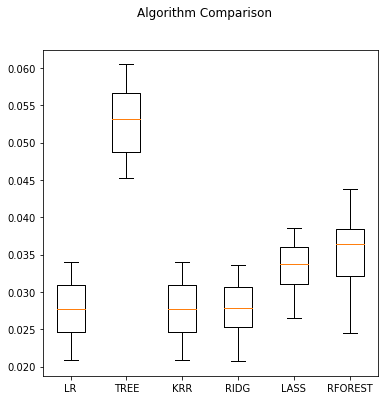

In [64]:
# Testing functions with pca included
X_train, y_train = process_data(train_input, mode='train', pca_flag=True)
X_test, y_test = process_data(test_input, mode='test', pca_flag=True)

print('TRAINING...')
training_results(X_train, y_train)


TESTING...
LR Testing RMSE: 0.026238420251948242
LR Testing R^2: 0.8365439179789139
TREE Testing RMSE: 0.05156153129990197
TREE Testing R^2: 0.36878497073136496
KRR Testing RMSE: 0.026238376894440724
KRR Testing R^2: 0.8365444581823547
RIDG Testing RMSE: 0.026238187113365615
RIDG Testing R^2: 0.8365468227079043
LASS Testing RMSE: 0.03285603464080051
LASS Testing R^2: 0.7436956289090108
RFOREST Testing RMSE: 0.03231620256314814
RFOREST Testing R^2: 0.7520487164780436


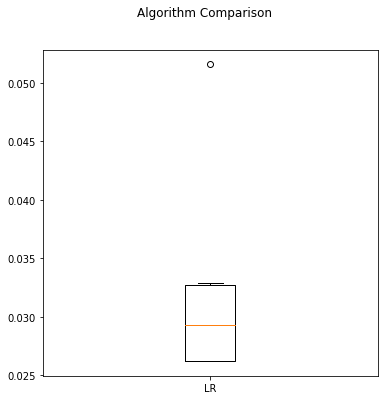

In [60]:
print('TESTING...')
testing_results(X_test, y_test)

Not Using PCA

TRAINING...
LR:  RMSE: 115970031.5959 (263801354.2059)  R^2: -31369059064765931520.0000 (79283783511179657216.0000)
TREE:  RMSE: 0.0376 (0.0052)  R^2: 0.6877 (0.0396)
KRR:  RMSE: 0.0247 (0.0071)  R^2: 0.8440 (0.1070)
RIDG:  RMSE: 0.0245 (0.0048)  R^2: 0.8616 (0.0425)
LASS:  RMSE: 0.0279 (0.0047)  R^2: 0.8234 (0.0330)
RFOREST:  RMSE: 0.0250 (0.0046)  R^2: 0.8572 (0.0356)


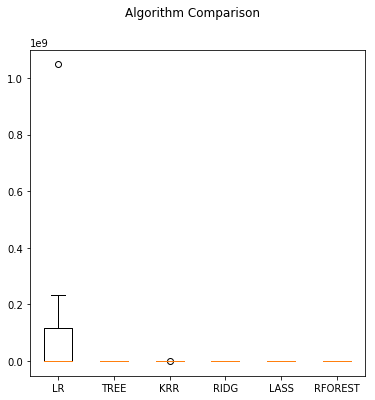

TESTING...
LR Testing RMSE: 543708089.4285309
LR Testing R^2: -5.197924059444258e+19
TREE Testing RMSE: 0.07022686121943748
TREE Testing R^2: 0.13282877721762698
KRR Testing RMSE: 0.04504265811878198
KRR Testing R^2: 0.6432644712720557
RIDG Testing RMSE: 0.030496611410118023
RIDG Testing R^2: 0.8364684651000639
LASS Testing RMSE: 0.038821621955433434
LASS Testing R^2: 0.7350001102122782
RFOREST Testing RMSE: 0.06020487510026348
RFOREST Testing R^2: 0.3626739640465231


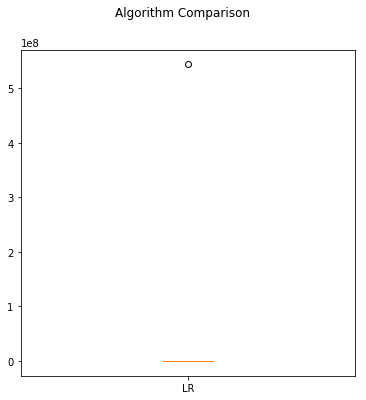

In [67]:
A_train, B_train = process_data(train_input, mode='train', pca_flag=False)
A_test, B_test = process_data(test_input, mode='test', pca_flag=False)
print('TRAINING...')
training_results(A_train, B_train)
print('TESTING...')
testing_results(A_test, B_test)

In [51]:
def GS_model(X, y, ML_model ,param_grid, cv=10):
    para_search = GridSearchCV(estimator=ML_model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=cv, \
                           return_train_score=True)
    para_search = para_search.fit(X,y)
    return(para_search.best_estimator_)


In [34]:
# set up models and params for gridsearch

KRR = KernelRidge()
KRR_grid_param = {'alpha': np.linspace(.00001,.0005, num=1), 'coef0': [5, 10, 25], \
             'degree': [1], 'gamma': [None], 'kernel': ['polynomial']}
LASS=Lasso()
LASS_grid_param = {'alpha':np.linspace(0.0001,0.01,num=20), 'copy_X': [True], 'fit_intercept': [True], \
               'normalize': [False], 'precompute': [False],'max_iter': [300],'tol': [0.01], \
               'selection': ['random'], 'random_state': [None]}
RR=Ridge()
RR_grid_param = {'alpha': np.linspace(5,20,num=2)}
RFR=RandomForestRegressor()
RFR_grid_param = {'n_estimators': [400], 'max_features': ['auto','sqrt'], 'max_depth': [8,9,10],\
                  'criterion': ['mse'],'verbose':[2]}
EN=ElasticNet()
EN_grid_param = {'alpha': [.001,.01], 'copy_X': [True], \
              'l1_ratio': [.001,.0001], 'fit_intercept': [True], \
              'normalize': [False],'precompute': [False], 'max_iter': [5000], 'tol': [0.0001], \
              'selection': ['random'],'random_state': [None]}

In [ ]:
GS_model(X=X_train,y=y_train,ML_model=KRR,param_grid=KRR_grid_param)

In [27]:
GS_model(X=X_train,y=y_train,ML_model=LASS,param_grid=LASS_grid_param)

Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=300,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='random', tol=0.01, warm_start=False)

In [35]:
GS_model(X=X_train,y=y_train,ML_model=RR,param_grid=RR_grid_param)

Ridge(alpha=20.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [10]:
GS_model(X=X_train,y=y_train,ML_model=RFR,param_grid=RFR_grid_param)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=400, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [85]:
GS_model(X=X_train,y=y_train,ML_model=EN,param_grid=EN_grid_param)

ElasticNet(alpha=0.01, copy_X=True, fit_intercept=True, l1_ratio=0.001,
      max_iter=5000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='random', tol=0.0001, warm_start=False)

In [20]:

pca = PCA().fit(X_train)

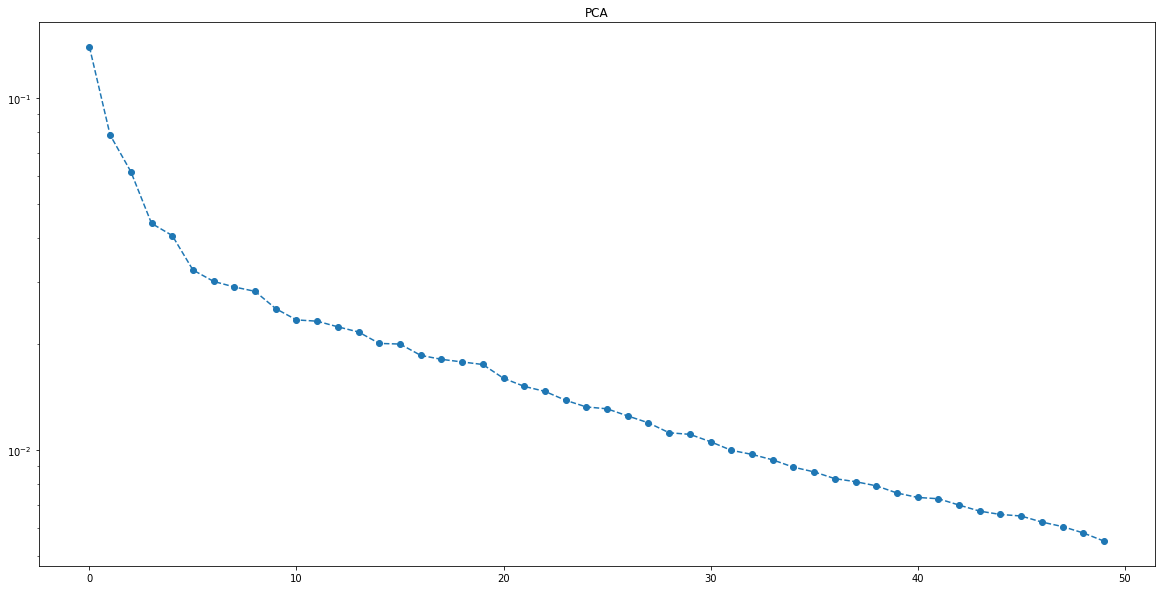

In [21]:
plt.figure(figsize=(20,10))
plt.title('PCA')
plt.semilogy(pca.explained_variance_ratio_, '--o')

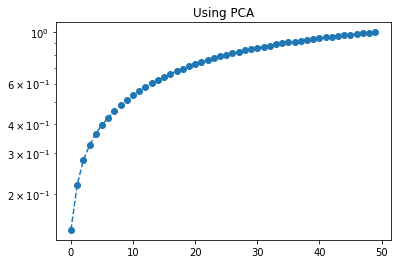

In [22]:
plt.title('Using PCA')
plt.semilogy(pca.explained_variance_ratio_.cumsum(), '--o')

In [29]:
pca.explained_variance_ratio_.cumsum()[20]

0.7289144080753105

In [ ]:
class AveragingModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, models):
        self.models = models
        
    # we define clones of the original models to fit the data in
    def fit(self, X, y):
        self.models_ = [clone(x) for x in self.models]
        
        # Train cloned base models
        for model in self.models_:
            model.fit(X, y)

        return self
    
    #Now we do the predictions for cloned models and average them
    def predict(self, X):
        predictions = np.column_stack([
            model.predict(X) for model in self.models_
        ])
        return np.mean(predictions, axis=1) 

In [ ]:
class StackingAveragedModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, base_models, meta_model, n_folds=5):
        self.base_models = base_models
        self.meta_model = meta_model
        self.n_folds = n_folds
   
    # We again fit the data on clones of the original models
    def fit(self, X, y):
        self.base_models_ = [list() for x in self.base_models]
        self.meta_model_ = clone(self.meta_model)
        kfold = KFold(n_splits=self.n_folds, shuffle=True, random_state=156)
        
        # Train cloned base models then create out-of-fold predictions
        # that are needed to train the cloned meta-model
        out_of_fold_predictions = np.zeros((X.shape[0], len(self.base_models)))
        for i, model in enumerate(self.base_models):
            for train_index, holdout_index in kfold.split(X, y):
                instance = clone(model)
                self.base_models_[i].append(instance)
                instance.fit(X[train_index], y[train_index])
                y_pred = instance.predict(X[holdout_index])
                out_of_fold_predictions[holdout_index, i] = y_pred
                
        # Now train the cloned  meta-model using the out-of-fold predictions as new feature
        self.meta_model_.fit(out_of_fold_predictions, y)
        return self
   
    #Do the predictions of all base models on the test data and use the averaged predictions as 
    #meta-features for the final prediction which is done by the meta-model
    def predict(self, X):
        meta_features = np.column_stack([
            np.column_stack([model.predict(X) for model in base_models]).mean(axis=1)
            for base_models in self.base_models_ ])
        return self.meta_model_.predict(meta_features)

In [ ]:
averaged_models = AveragingModels(models = (ENet, GBoost, KRR, lasso))

score = rmsle_cv(averaged_models)
print(" Averaged base models score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))